In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/AusApparalSales4thQrt2020.csv')

In [5]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Time'].value_counts()

Time
 Morning      2520
 Afternoon    2520
 Evening      2520
Name: count, dtype: int64

In [9]:
df['State'].value_counts()

State
 WA     1080
 NT     1080
 SA     1080
 VIC    1080
 QLD    1080
 NSW    1080
 TAS    1080
Name: count, dtype: int64

In [10]:
df['Group'].value_counts()

Group
 Kids       1890
 Men        1890
 Women      1890
 Seniors    1890
Name: count, dtype: int64

#DATA WRANGLING

Checking missing data.

In [11]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

The given Data is clean and has no missing values.

#Checking Outlier


Checking outlier using IQR.

In [12]:
Q1,Q3 = df['Sales'].quantile([.25,.75])
iqr = Q3-Q1
upper = Q3+1.5*iqr
lower = Q1-1.5*iqr
print('Q1',Q1)
print('\nQ3',Q3)
print('\nIQR',iqr)
print('\nMAX',upper)
print('\nMIN',lower)

Q1 20000.0

Q3 65000.0

IQR 45000.0

MAX 132500.0

MIN -47500.0


In [13]:
Q1,Q3 = df['Unit'].quantile([.25,.75])
iqr = Q3-Q1
upper = Q3+1.5*iqr
lower = Q1-1.5*iqr
print('Q1',Q1)
print('\nQ3',Q3)
print('\nIQR',iqr)
print('\nMAX',upper)
print('\nMIN',lower)

Q1 8.0

Q3 26.0

IQR 18.0

MAX 53.0

MIN -19.0


In [14]:
df['sales_outlier'] = df['Sales']>132500
df['sales_outlier'].sum()

123

In [15]:
df['unit_outlier'] = df['Unit']>53
df['unit_outlier'].sum()

123

Using MinMax Normalization For Treating the Oulier.

In [16]:
df['sales_normalization'] = (df['Sales']-df['Sales'].min())/(df['Sales'].max()-df['Sales'].min())

In [17]:
df['unit_normalization'] = (df['Unit']-df['Unit'].min())/(df['Unit'].max()-df['Unit'].min())

The above Data is normalize using the min max Normalize.

#Recommendation on the usage of the groupby() function for data chunking or merging.

#Data Chunking:
When working with large datasets, groupby() can be used to process data in chunks.We can group the data into manageable chunks, process each chunk, and then combine the results.

#Merging:
groupby() can be used to merge two or more DataFrames based on common keys. It's similar to SQL's JOIN operation but allows for more flexibility and customization.

#DATA ANALYSIS

Descriptive statical analysis.

In [18]:
df.agg({'Sales':['count','min','max','mean','median','std'],'Unit':['count','min','max','mean','median','std'],'sales_normalization':['count','min','max','mean','median','std'],'unit_normalization':['count','min','max','mean','median','std']})

,Sales,Unit,sales_normalization,unit_normalization
count,7560.000000,7560.000000,7560.000000,7560.000000
min,5000.000000,2.000000,0.000000,0.000000
max,162500.000000,65.000000,1.000000,1.000000
mean,45013.558201,18.005423,0.254054,0.254054
median,35000.000000,14.000000,0.190476,0.190476
std,32253.506944,12.901403,0.204784,0.204784


In [19]:
df.groupby('Group')['Sales'].sum().to_frame()

,Sales
Group,
Kids,85072500
Men,85750000
Seniors,84037500
Women,85442500


In [20]:
df.groupby('Group')['Sales'].sum().max() # Men Group have the highest sales.

85750000

In [21]:
df.groupby('Group')['Sales'].sum().min() # Seniors group have the lowest sales.

84037500

In [22]:
df.groupby('State')['Sales'].sum().to_frame()

,Sales
State,
NSW,74970000
NT,22580000
QLD,33417500
SA,58857500
TAS,22760000
VIC,105565000
WA,22152500


In [23]:
df.groupby('State')['Sales'].sum().to_frame().max()

Sales    105565000
dtype: int64

VIC state has the highest sales.

In [24]:
df.groupby('State')['Sales'].sum().to_frame().min() # WA State has the lowest sales.

Sales    22152500
dtype: int64

WA State has the lowest sales.

In [25]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Month name'] = df['Date'].dt.month_name()
df['Day_Name'] = df['Date'].dt.day_name()


In [26]:
df.head()

,Date,Time,State,Group,Unit,Sales,sales_outlier,unit_outlier,sales_normalization,unit_normalization,Month,Year,Day,Month name,Day_Name
0,2020-10-01,Morning,WA,Kids,8,20000,False,False,0.095238,0.095238,10,2020,1,October,Thursday
1,2020-10-01,Morning,WA,Men,8,20000,False,False,0.095238,0.095238,10,2020,1,October,Thursday
2,2020-10-01,Morning,WA,Women,4,10000,False,False,0.031746,0.031746,10,2020,1,October,Thursday
3,2020-10-01,Morning,WA,Seniors,15,37500,False,False,0.206349,0.206349,10,2020,1,October,Thursday
4,2020-10-01,Afternoon,WA,Kids,3,7500,False,False,0.015873,0.015873,10,2020,1,October,Thursday


In [27]:
df.groupby('Month name')['Sales'].sum().to_frame()

,Sales
Month name,
December,135330000
November,90682500
October,114290000


In [28]:
df['Month name'].value_counts().index

Index(['October', 'November', 'December'], dtype='object', name='Month name')

In [29]:
df.groupby('Day_Name')['Sales'].sum().to_frame()# Sales Report basis on Week.

,Sales
Day_Name,
Friday,48000000
Monday,48050000
Saturday,46245000
Sunday,48330000
Thursday,49405000
Tuesday,50327500
Wednesday,49945000


In [30]:
df.groupby([df['Month name'],df['Group']])['Sales'].sum().to_frame() #Sales Report basis on Month.

Sales
Month name Group             
December    Kids     33555000
            Men      34250000
            Seniors  33150000
            Women    34375000
November    Kids     22882500
            Men      22615000
            Seniors  22322500
            Women    22862500
October     Kids     28635000
            Men      28885000
            Seniors  28565000
            Women    28205000

In [31]:
df.groupby([df['Day_Name'],df['Group']])['Sales'].sum().to_frame()

Sales
Day_Name  Group             
Friday     Kids     12015000
           Men      12430000
           Seniors  11577500
           Women    11977500
Monday     Kids     12112500
           Men      12350000
           Seniors  11587500
           Women    12000000
Saturday   Kids     11457500
           Men      11620000
           Seniors  11477500
           Women    11690000
Sunday     Kids     11787500
           Men      12137500
           Seniors  12040000
           Women    12365000
Thursday   Kids     12497500
           Men      12315000
           Seniors  12310000
           Women    12282500
Tuesday    Kids     12832500
           Men      12065000
           Seniors  12667500
           Women    12762500
Wednesday  Kids     12370000
           Men      12832500
           Seniors  12377500
           Women    12365000

In [32]:
df.groupby([df['Year'],df['Group']])['Sales'].sum().to_frame()

Sales
Year Group             
2020  Kids     85072500
      Men      85750000
      Seniors  84037500
      Women    85442500

In [33]:
df.groupby([df['Month name'],df['Day_Name'],df['Group']])['Sales'].sum().to_frame().head(30)

Sales
Month name Day_Name  Group            
December   Friday     Kids     4387500
                      Men      4720000
                      Seniors  4052500
                      Women    4375000
           Monday     Kids     4440000
                      Men      4580000
                      Seniors  4245000
                      Women    4682500
           Saturday   Kids     4542500
                      Men      4505000
                      Seniors  4467500
                      Women    4672500
           Sunday     Kids     4180000
                      Men      4447500
                      Seniors  4460000
                      Women    4667500
           Thursday   Kids     4522500
                      Men      4655000
                      Seniors  4565000
                      Women    4520000
           Tuesday    Kids     5895000
                      Men      5502500
                      Seniors  5745000
                      Women    5802500
           Wednesday  Kids     5587500
                      Men      5840000
                      Seniors  5615000
                      Women    5655000
November   Friday     Kids     3072500
                      Men      2922500

In [34]:
df.groupby([df['Month name'],df['Day_Name'],df['State'],df['Time'],df['Group']])['Sales'].sum().to_frame().head(30)

Sales
Month name Day_Name State Time       Group           
December   Friday    NSW   Afternoon  Kids     327500
                                      Men      327500
                                      Seniors  350000
                                      Women    227500
                           Evening    Kids     240000
                                      Men      310000
                                      Seniors  312500
                                      Women    375000
                           Morning    Kids     347500
                                      Men      362500
                                      Seniors  282500
                                      Women    385000
                     NT    Afternoon  Kids      92500
                                      Men      112500
                                      Seniors  102500
                                      Women    105000
                           Evening    Kids      85000
                                      Men      132500
                                      Seniors  100000
                                      Women     97500
                           Morning    Kids      87500
                                      Men      102500
                                      Seniors   92500
                                      Women     92500
                     QLD   Afternoon  Kids     127500
                                      Men      130000
                                      Seniors  125000
                                      Women    122500
                           Evening    Kids     150000
                                      Men      147500

The above Analysis shows the sales done by different Group on different Time in Different State in particular Day in particular Month.

#DATA VISUALIZATION.

○	State-wise sales analysis for different groups (kids, women, men, and seniors)

<Axes: xlabel='State', ylabel='Sales'>

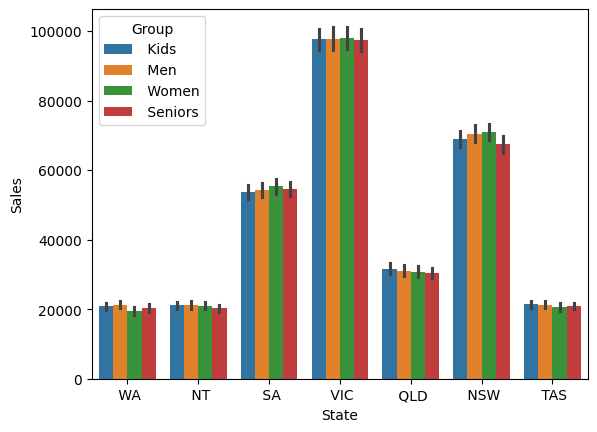

In [35]:
sns.barplot(x='State',y='Sales',hue='Group',data=df)

○	Group-wise sales analysis (kids, women, men, and seniors) across different states.

<Axes: xlabel='Group', ylabel='Sales'>

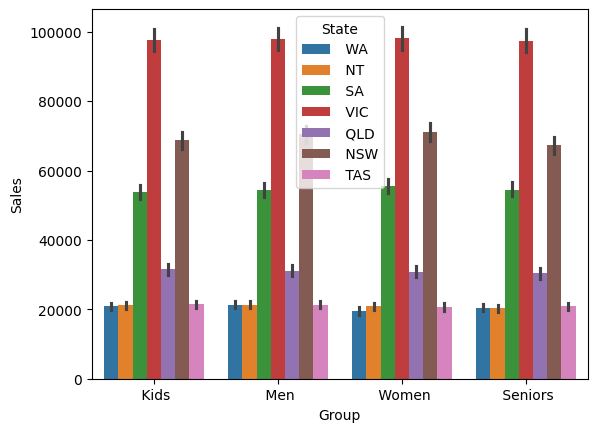

In [36]:
sns.barplot(x='Group',y='Sales',hue='State',data=df)

○	Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest

*Time wise Sales Analysis across different state.

<Axes: xlabel='Time', ylabel='Sales'>

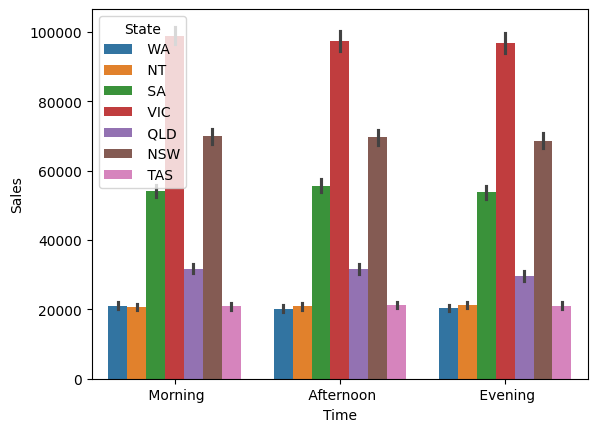

In [37]:
sns.barplot(x='Time',y='Sales',hue='State',data=df)#Time and Sales analysis according to the State

* Time wise sales across different Group.

<Axes: xlabel='Time', ylabel='Sales'>

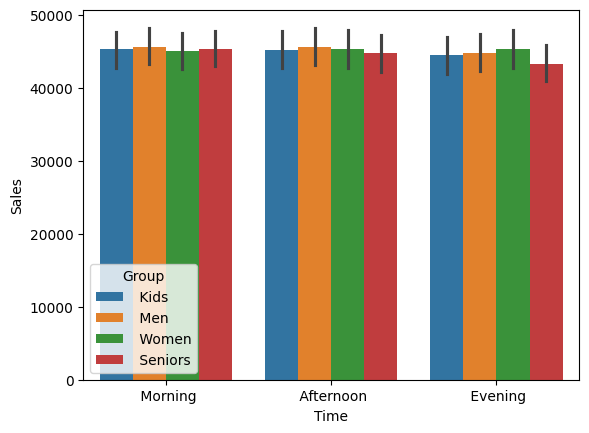

In [38]:
sns.barplot(x='Time',y='Sales',hue='Group',data=df) # Time and Sales analysis according to the Group.

*Month Wise sales across different group.

<Axes: xlabel='Month name', ylabel='Sales'>

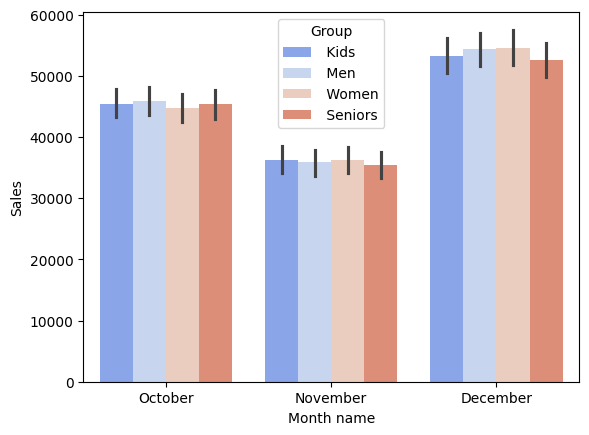

In [39]:
sns.barplot(x='Month name',y='Sales',hue='Group',data=df ,palette = 'coolwarm')

<Axes: xlabel='Day_Name', ylabel='Sales'>

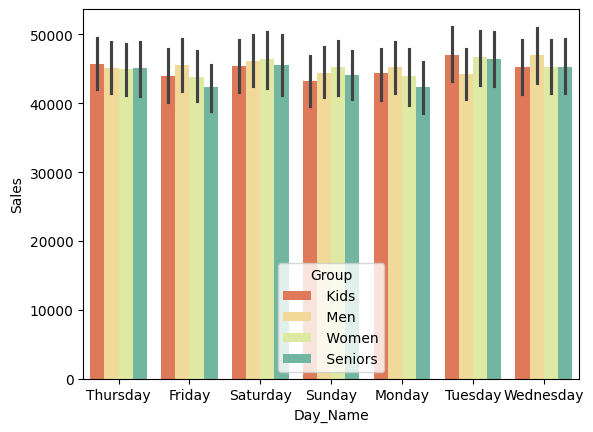

In [40]:
sns.barplot(x='Day_Name',y='Sales',hue='Group',data=df,palette = 'Spectral')

<Axes: xlabel='Month name', ylabel='Sales'>

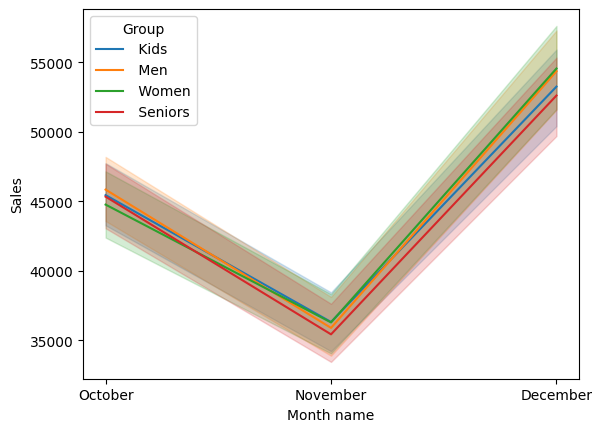

In [41]:
sns.lineplot(x='Month name',y='Sales',hue ='Group',data=df)

#Recommendations for using Seaborn library.

**Attractive Default Styles:**

Seaborn has pleasing default styles and color palettes, making your plots look professional without much customization.

**High-Level Interface:**

Seaborn provides easy-to-use functions for creating complex visualizations like heatmaps, violin plots, and pair plots with just a few lines of code.


#Report Generation.

### **Sales Analysis**
    
*   State VIC has Maximum Sales and contribute around 31% of the total Sales.
*   State WA has the Minimum Sales and contribute around 6.5% of the total Sales.

*   Sales decreases across different group from October to November and increase from November to December.
*   Sales has no difference on different Timing across diffrent Group.

###Visualization of Descriptive Statistics.

Text(0.5, 1.0, 'Box Plot of Sales ')

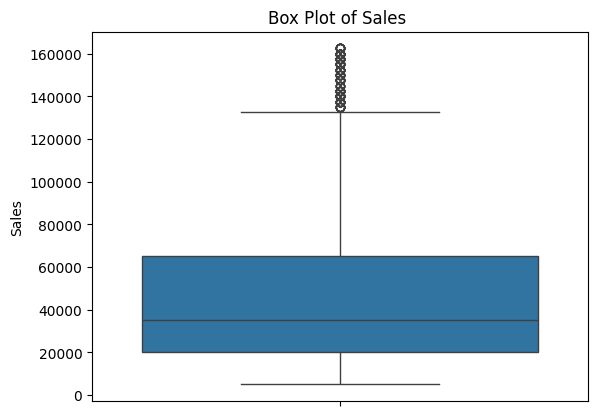

In [58]:
sns.boxplot(y='Sales',data=df)
plt.title('Box Plot of Sales ')

Text(0.5, 1.0, 'Box Plot For Unit')

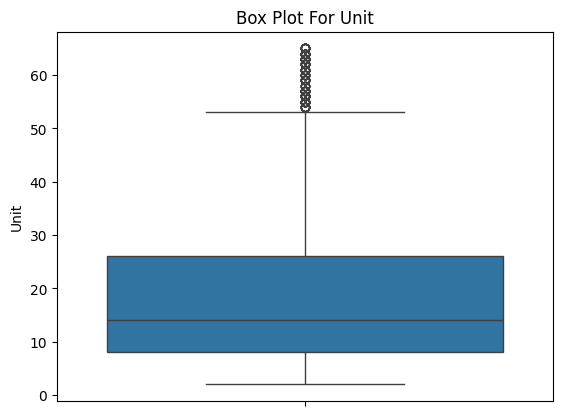

In [59]:
sns.boxplot(y='Unit',data=df)
plt.title('Box Plot For Unit')

Text(0.5, 1.0, 'Histogram For Sales')

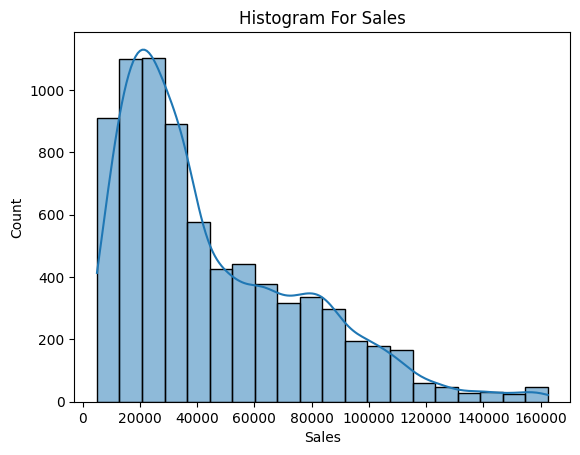

In [70]:
sns.histplot(x="Sales",data=df,bins=20,kde=True)
plt.title('Histogram For Sales')

Text(0.5, 1.0, 'Histogram For Unit')

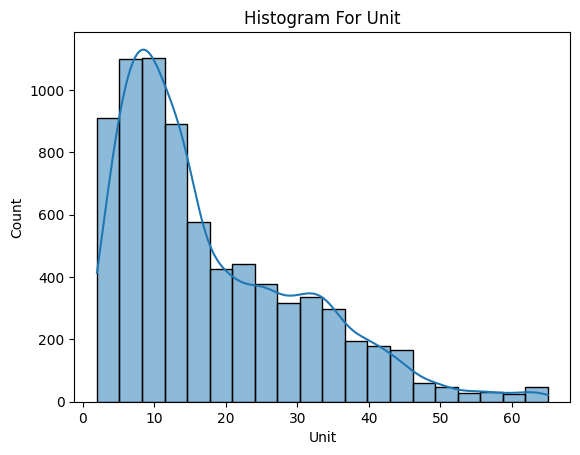

In [66]:
sns.histplot(x="Unit",data=df,bins=20,kde=True)
plt.title('Histogram For Unit')